# Regression

# Librarys

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(13)


# Data for example

In [4]:
df = pd.read_csv("data/house prices/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

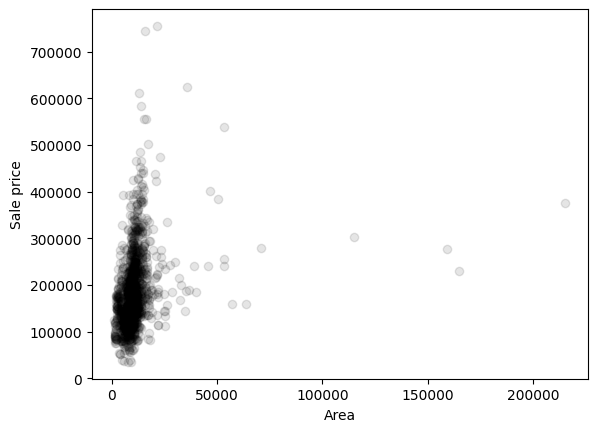

In [6]:
x_train = df["LotArea"]
y_train = df["SalePrice"]

plt.scatter(x_train, y_train, color="black", alpha=0.1)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()

# Linear Regression

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

In [7]:
def calculate_model_output(w, b, x):
    """
    Computes the prediction of a linear model
    
    Args:
        x (ndarray (m,)): Data, m examples
        w, b (scalar)   : model parameters
    
    Returns
        f_wb (ndarray (m,)): model prediction
    """
    
    f_wb = np.zeros(x.shape)
    for i in range (len(x)):
        f_wb[i] = w * x[i] + b

    return f_wb

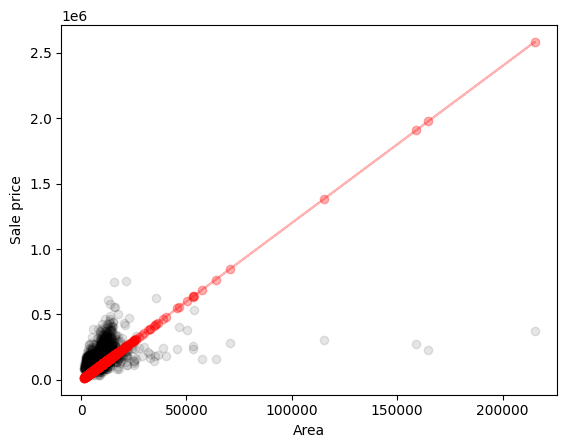

In [8]:
outputs = calculate_model_output(12, -220, x_train)

plt.scatter(x_train, y_train, color="black", alpha=0.1)
plt.plot(x_train, outputs, color="red", marker="o", alpha=0.3)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()


# Cost function

The cost function, also known as the loss function or objective function, serves as a measure of how well a model is performing by quantifying the difference between the predicted output of the model and the actual target values.

In supervised learning tasks, the goal is typically to minimize this cost function. This minimization process is what drives the training of machine learning models. Different algorithms and tasks may require different cost functions. This is the one that we will be using:

Mean Squared Error (MSE):

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 

where 
- $f_{w,b}(x^{(i)})$ is the prediction for $x_i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

In [9]:
def cost_function(w, b, x, y):
    """
    Computes the cost for linear regression

    Args:
        w (scalar):             parameter of the model
        b (scalar):             parameter of the model
        x (ndarray): Shape (m,) variable
        y (ndarray): Shape (m,) target

    Returns:
        cost (float): The cost of using (w, b) as the parameters for linear regression
            to fit the data points in x and y
    """
    
    
    predict = calculate_model_output(w, b, x)
    m = len(x)
    cost_i = 0
    for i in range (m):
        cost_i += (y[i] - predict[i])**2

    return (1/(2*m)) * cost_i

In [10]:
cost_function(12, -220, df["LotArea"], df["SalePrice"])

9321875810.033562

## Visualization

The goal is to find a model which will accurately predict $y$ given an input $x$. The cost is a measure of how accurate the model is on the training data. In this visualization one variable changes (w), another remains constant (b).

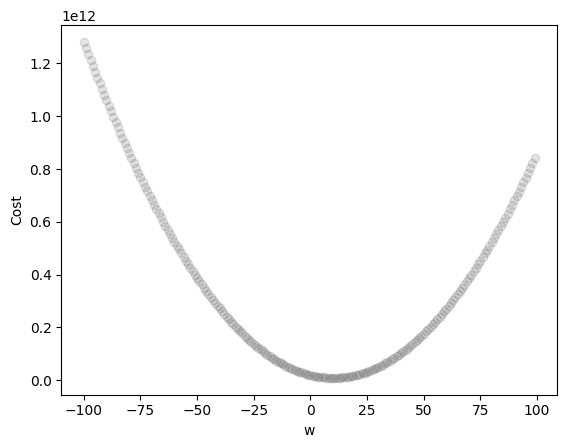

In [11]:
for i in range(-100, 100):
    cost = cost_function(i, 200, x_train, y_train)
    plt.scatter(i, cost, color="black", alpha=0.1)


plt.ylabel('Cost')
plt.xlabel('w')
plt.show()

Both variables change

In [12]:
w_i = []
b_i = []
costs = []

for i in range(-25, 50):
    for j in range(-25, 50):
        w_i.append(i)
        b_i.append(j)
        cost = cost_function(i, j, x_train, y_train)
        costs.append(cost)

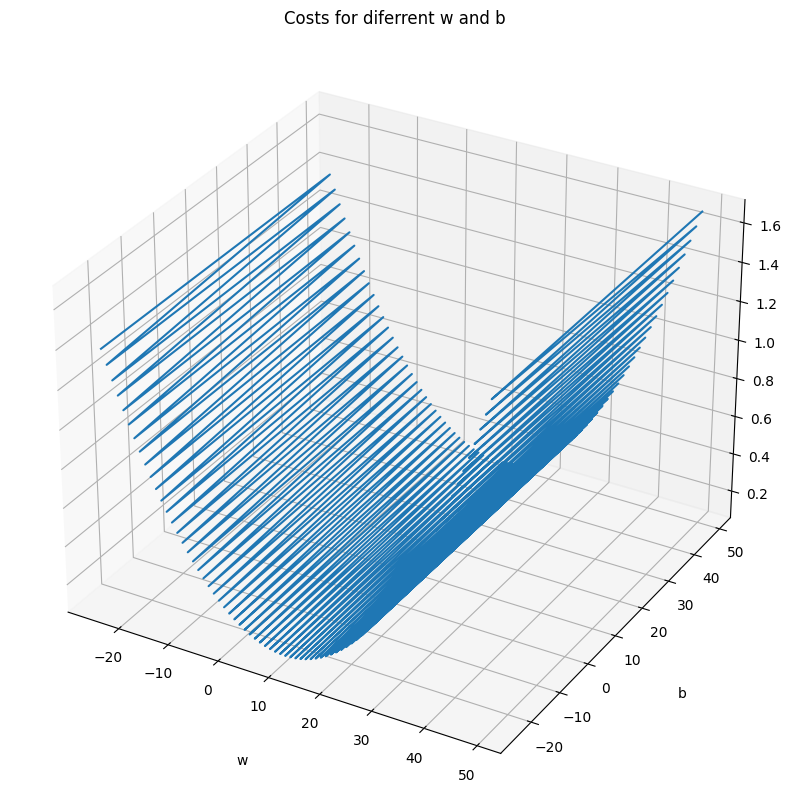

In [13]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot3D(w_i, b_i, costs)

ax.set_xlabel('w', labelpad=20)
ax.set_ylabel('b', labelpad=20)
ax.set_zlabel('cost', labelpad=20)

ax.set_title('Costs for diferrent w and b')
plt.show()

# Gradient Descent

*Dradient descent* can be described as:

$$
\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial b} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}
$$

The parameters $w$ and $b$ are updated simultaneously.  

The gradient are the partial derivatives of the cost function $J(w, b)$ with respect to $w$ and $b$ separetly, defined as:

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

The derivatives are used in gradient descent algorithms to update the parameters iteratively.

This is the math to calculate the partial derivatives of the cost function. In this demonstration, it is utilized the product rule:
$
\frac{d}{dx}(u \cdot v) = u\frac{dv}{dx} + v\frac{du}{dx}
$

Demonstration:

$$
\begin{align*}
\frac{\partial J(w, b)}{\partial w} &= \frac{\partial \frac{1}{2m} \sum\limits_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2}{\partial w} \\
&= \frac{1}{2m} \sum\limits_{i=1}^{m} \frac{\partial (w \cdot x^{(i)} + b - y^{(i)})^2}{\partial w} \\
&= \frac{1}{2m} \sum\limits_{i=1}^{m} (w \cdot x^{(i)} + b - y) \cdot \frac{\partial (w \cdot x^{(i)} + b - y)}{\partial w} + \frac{\partial (w \cdot x^{(i)} + b - y)}{\partial w} \cdot (w \cdot x^{(i)} + b - y) \\
&= \frac{1}{2m} \sum\limits_{i=1}^{m} (w \cdot x^{(i)} + b - y) \cdot 2 \cdot  x^{(i)} \\
&= \frac{1}{m} \sum\limits_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)}) \cdot x^{(i)}
\end{align*}
$$

$$
\begin{align*}
\frac{\partial J(w, b)}{\partial b} &= \frac{\partial \frac{1}{2m} \sum\limits_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2}{\partial b} \\
&= \frac{1}{2m} \sum\limits_{i=1}^{m} \frac{\partial (w \cdot x^{(i)} + b - y^{(i)})^2}{\partial b} \\
&= \frac{1}{2m} \sum\limits_{i=1}^{m} (w \cdot x^{(i)} + b - y) \cdot \frac{\partial (w \cdot x^{(i)} + b - y)}{\partial b} + \frac{\partial (w \cdot x^{(i)} + b - y)}{\partial b} \cdot (w \cdot x^{(i)} + b - y) \\
&= \frac{1}{2m} \sum\limits_{i=1}^{m} (w \cdot x^{(i)} + b - y) \cdot 2 \\
&= \frac{1}{m} \sum\limits_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})
\end{align*}
$$

## Implement Gradient Descent

Gradient descent algorithm will be implemented for one feature.

Conventions:
- The naming of python variables containing partial derivatives follows this pattern, $\frac{\partial J(w, b)}{\partial w}$  will be `dJ_dw`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.

In [14]:
def compute_gradient(x, y, w, b):
    """
    Auxiliar function to compute the gradient for linear regression

    Args:
        x (array_like): Input features.
        y (array_like): Target values.
        w (float): Weight parameter.
        b (float): Bias parameter.

    Returns:
        tuple: Tuple containing the partial derivatives of the cost function with respect to w and b.
    """
    
    m = len(x)
    dJ_dw = 0
    dJ_db = 0

    # Calculate the sum from the formula
    for i in range(m):
        f_wb_i = w * x[i] + b
        
        # Sum of partial derivatives of cost for this example
        dJ_dw += (f_wb_i - y[i]) * x[i]
        dJ_db += (f_wb_i - y[i])

    dJ_dw = (1/m) * dJ_dw
    dJ_db = (1/m) * dJ_db
    
    return dJ_dw, dJ_db


def gradient_descent(x, y, lr=0.0000001, thold=1e-6, iterations=100):
    """
    Performs gradient descent optimization to find the optimal parameters for linear regression.

    Args:
        x (array_like): Input features.
        y (array_like): Target values.
        lr (float, optional): Learning rate for gradient descent. Defaults to 0.0000001.
        thold (float, optional): Threshold for convergence. Defaults to 1e-6.
        iterations (int, optional): Maximum number of iterations. Defaults to 100.

    Returns:
        tuple: Tuple containing the optimal weight, bias, lists of weight and bias values during optimization, and list of costs during optimization.
    """
    
    w = np.random.rand()
    b = np.random.rand()
    w_history = []
    b_history = []
    costs_history = []  # current cost = costs_history[-1] / last cost = costs_history[-2]
    
    for i in range(iterations):
        dJ_dw, dJ_db = compute_gradient(x, y, w, b)
        # Updating parameters
        w = w - lr * dJ_dw
        b = b - lr * dJ_db
        
        costs_history.append(cost_function(w, b, x, y))
        w_history.append(w)
        b_history.append(b)
        
        # Printing the parameters for every 100th iteration
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {costs_history[-1]}, Weight {w}, Bias {b}")
        
        
        if len(costs_history) >= 2 and abs(costs_history[-2] - costs_history[-1]) <= thold:
            break
    
    return w, b, w_history, b_history, costs_history    


def plot_gradient_descent(w_history, b_history, costs_history):
    """
    Plots the optimization process of gradient descent.

    Args:
        w_history (array_like): List of weight values during optimization.
        b_history (array_like): List of bias values during optimization.
        costs_history (array_like): List of cost values during optimization.
    """
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    ax[0].plot(w_history, costs_history)
    ax[0].scatter(w_history, costs_history, marker='o', color='red')
    ax[0].set_xlabel('w')
    ax[0].set_ylabel('cost')
    ax[0].set_title('costs_history for different w')
    
    iterations_array = np.arange(1, len(costs_history) + 1)
    ax[1].plot(iterations_array, costs_history)
    ax[1].scatter(iterations_array, costs_history, marker='o', color='red')
    ax[1].set_xlabel('iterations')
    ax[1].set_ylabel('cost')
    ax[1].set_title('costs_history by iterations')
    
    ax[2] = fig.add_subplot(133, projection='3d')  # Adicione o subplot 3D ao conjunto de eixos da figura
    ax[2].plot3D(w_history, b_history, costs_history)
    ax[2].scatter(w_history, b_history, costs_history, color='red')  # Adicione scatter em 3D
    ax[2].set_xlabel('w')
    ax[2].set_ylabel('b')
    ax[2].set_zlabel('cost')
    ax[2].set_title('Costs for different w and b')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Iteration 0: Cost 14543668896.354208, Weight 2.7260420176339757, Bias 0.23771396203071038
Iteration 100: Cost 8909574515.920109, Weight 10.048398354998925, Bias 0.2456047529685504
Iteration 200: Cost 8909573949.759106, Weight 10.048397978881882, Bias 0.2531291200201702
Iteration 300: Cost 8909573383.598192, Weight 10.048397602349416, Bias 0.26065348671532507
Iteration 400: Cost 8909572817.437283, Weight 10.048397225816974, Bias 0.268177853054036
Iteration 500: Cost 8909572251.276442, Weight 10.048396849284547, Bias 0.27570221903630304
Iteration 600: Cost 8909571685.115665, Weight 10.048396472752138, Bias 0.2832265846621262
Iteration 700: Cost 8909571118.954948, Weight 10.048396096219747, Bias 0.29075094993150546
Iteration 800: Cost 8909570552.794262, Weight 10.048395719687374, Bias 0.2982753148444408
Iteration 900: Cost 8909569986.633635, Weight 10.048395343155017, Bias 0.30579967940093233
Iteration 1000: Cost 8909569420.47308, Weight 10.048394966622679, Bias 0.31332404360098004
Iterat

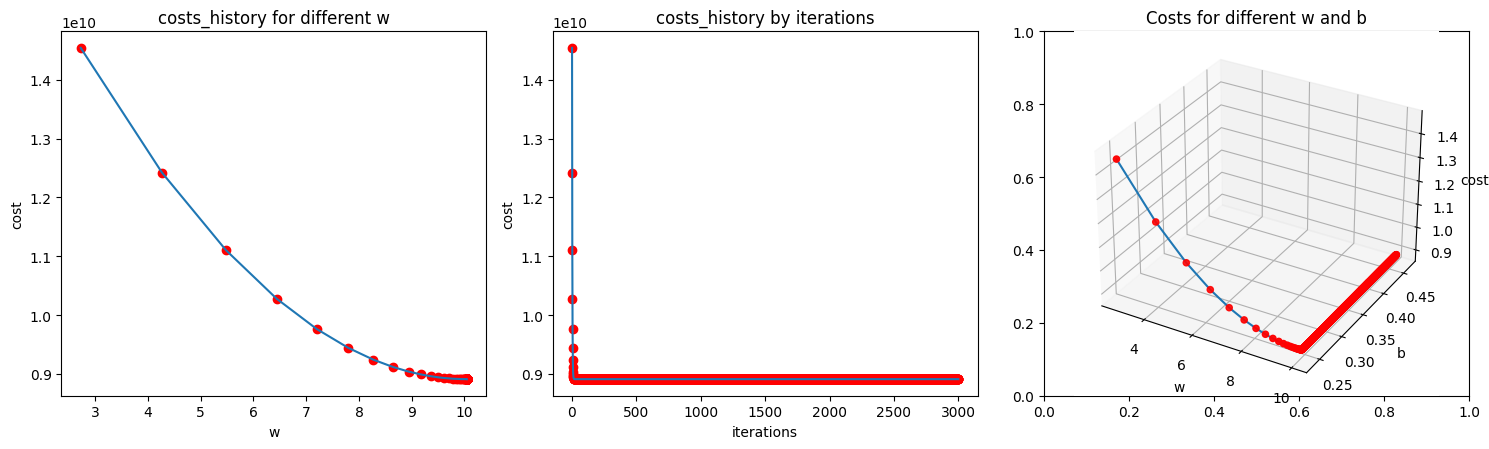

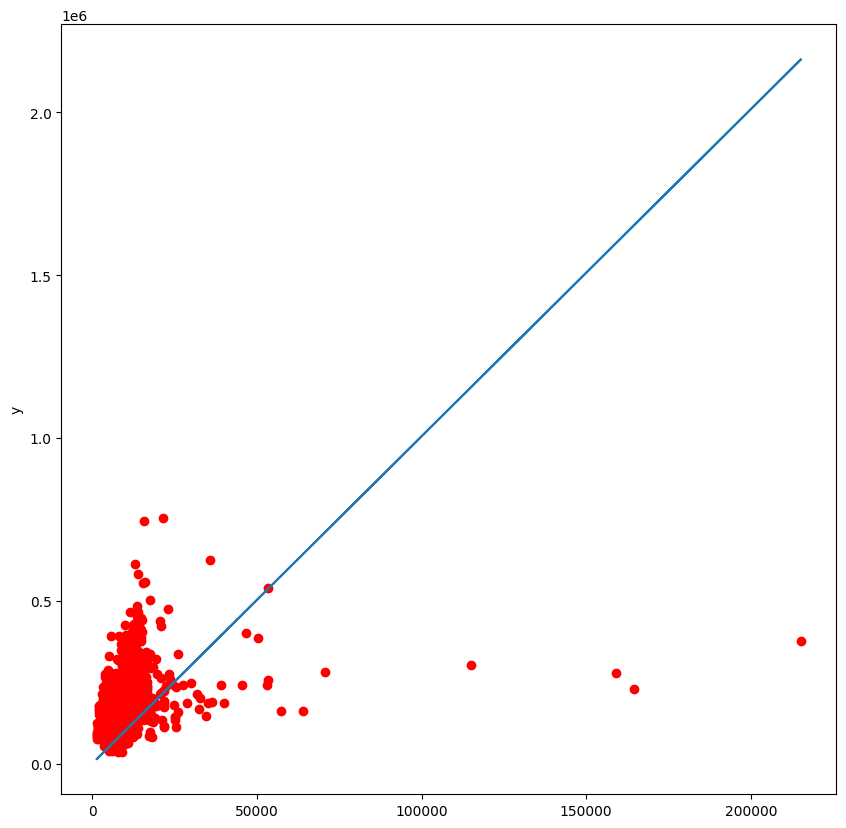

In [15]:
# Test our algorithm
w, b, w_history, b_history, costs_history = gradient_descent(x = x_train, y = y_train, lr = 0.000000001, iterations=3000)

plot_gradient_descent(w_history, b_history, costs_history)


y_calculated = calculate_model_output(w, b, x_train)


fig = plt.figure(figsize=(10,10))

plt.plot(x_train, y_calculated)
plt.scatter(x_train, y_train, color='red')
plt.ylabel('y')

plt.show()

Our algorithm works for fitting a relationship between 2 variables.

# Vectorization

Andrew Ng in his ML Course recommends using vectorization to accelerate calculation on code. So we will be implementing this 

In [16]:
def calculate_model_output(w, b, x):
    f_wb = np.dot(x, w) + b  # Vectorized
    return f_wb


def cost_function(w, b, x, y):
    predict = calculate_model_output(w, b, x)
    m = len(x)
    cost = np.sum((y - predict)**2)  / (2*m) # Vectorized
    
    return  cost


def compute_gradient(x, y, w, b):
    m = len(x)
    f_wb = calculate_model_output(w, b, x)
    j_wb_der_w = np.sum((f_wb - y) * x)
    j_wb_der_b = np.sum(f_wb - y)

    j_wb_der_w *= (1 / m)
    j_wb_der_b *= (1 / m)
    
    return j_wb_der_w, j_wb_der_b

# Multiple Linear Regression

In [123]:
def calculate_model_output_multiple(w, b, x):
    """
    Computes the model output for multiple linear regression

    Args:
        w (ndarray): Shape (n,) parameter of the model
        b (scalar): Parameter of the model
        x (ndarray): Shape (m, n) variable, where m is the number of samples and n is the number of features

    Returns:
        f_wb (ndarray): Shape (m,) model output for each sample
    """
    f_wb = np.dot(x, w) + b
    return f_wb


def compute_gradient_multiple(x, y, w, b):
    """
    Computes the gradient using formula

    Args:
        x (ndarray): Shape (m, n) variable, where m is the number of samples and n is the number of features
        y (ndarray): Shape (m,) target
        w (ndarray): Shape (n,) parameter of the model
        b (scalar): Parameter of the model

    Returns:
        dJ_dw (ndarray): Partial derivative of cost with respect to w, shape (n,)
        dJ_db (scalar): Partial derivative of cost with respect to b
    """
    
    m = len(x)
    f_wb = calculate_model_output_multiple(w, b, x)
    dJ_dw = np.dot((f_wb - y), x)
    dJ_db = np.sum(f_wb - y)
    
    dJ_dw = np.multiply(dJ_dw, 1/m)
    dJ_db *= (1 / m)
    
    
    return dJ_dw, dJ_db


def multiple_linear_regression(x, y, lr=0.00000001, thold=1e-2, iterations=1000, verbose=True):
    w = [np.random.rand() for _ in x.columns]
    b = np.random.rand()
    
    w_history = []
    b_history = []
    costs_history = []  # current cost = costs_history[-1] / last cost = costs_history[-2]
    
    for i in range(int(iterations)):
        dJ_dw, dJ_db = compute_gradient_multiple(x, y, w, b)
        # Updating parameters
        w = w - lr * dJ_dw
        b = b - lr * dJ_db
        
        costs_history.append(cost_function(w, b, x, y))
        w_history.append(w)
        b_history.append(b)

        # Printing the parameters for every 100th iteration
        if i % 5000 == 0 and verbose == True:
            print(f"Iteration {i}: Cost {costs_history[-1]}, Weight {w}, Bias {b}")
            
            
        if len(costs_history) >= 2 and abs(costs_history[-2] - costs_history[-1]) <= thold:
            break
    
    print(f"Model converged using  after {i} iterations with: \nCost: {costs_history[-1]} \nWeight: {w} \nBias: {b}")
    
    return w, b, w_history, b_history, costs_history

In [18]:
x_train = df[["LotArea", "OverallQual", "YearBuilt"]]
w, b, w_history, b_history, costs_history = multiple_linear_regression(x_train, y_train, lr=1e-9, thold = 1, iterations=1e5)

Iteration 0: Cost 14126331781.89198, Weight [2.74259639 0.9668737  1.30961413], Bias 0.4536195762164588
Iteration 5000: Cost 2836016716.339038, Weight [ 2.03454874  1.60037642 81.21681813], Bias 0.4911746321254608
Iteration 10000: Cost 2835985984.384885, Weight [ 2.03368362  1.99194559 81.22427325], Bias 0.4882083088860337
Iteration 15000: Cost 2835955321.6891656, Weight [ 2.03367828  2.38348519 81.2230901 ], Bias 0.4852376256595798
Iteration 20000: Cost 2835924659.5313635, Weight [ 2.03367304  2.77502135 81.22190602], Bias 0.48226696289089216
Iteration 25000: Cost 2835893997.9114685, Weight [ 2.03366779  3.16655407 81.22072195], Bias 0.4792963210576462
Iteration 30000: Cost 2835863336.8294706, Weight [ 2.03366254  3.55808336 81.21953789], Bias 0.4763257001597106
Iteration 35000: Cost 2835832676.285361, Weight [ 2.0336573   3.94960921 81.21835384], Bias 0.4733551001969017
Iteration 40000: Cost 2835802016.2791295, Weight [ 2.03365205  4.34113163 81.2171698 ], Bias 0.47038452116903606
It

In [19]:
w1_history = [w[0] for w in w_history]
w2_history = [w[1] for w in w_history]
w3_history = [w[2] for w in w_history]

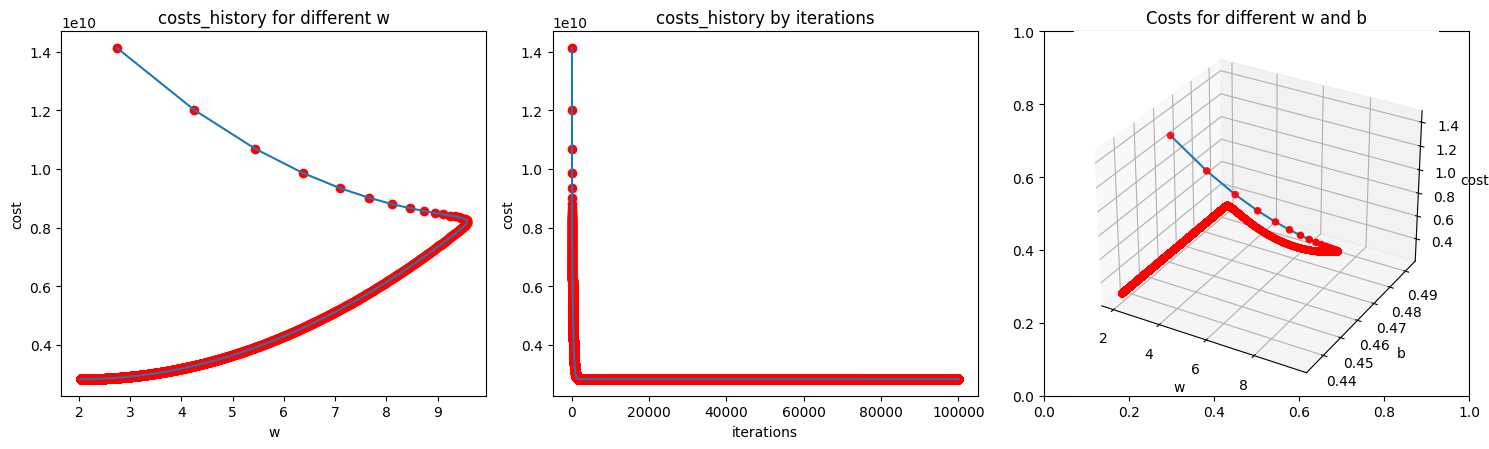

In [20]:
plot_gradient_descent(w1_history, b_history, costs_history)

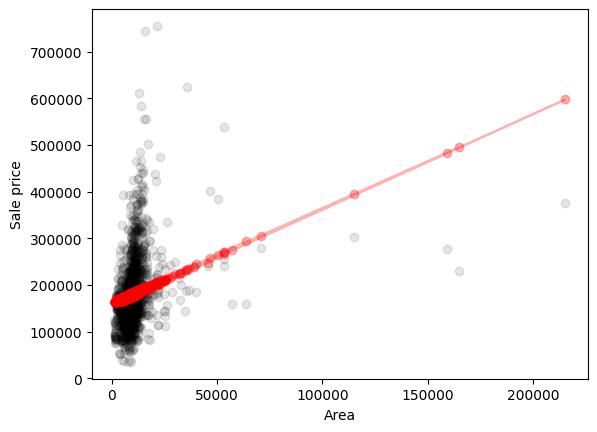

In [21]:
outputs = calculate_model_output(w, b, x_train)

plt.scatter(x_train["LotArea"], y_train, color="black", alpha=0.1)
plt.plot(x_train["LotArea"], outputs, color="red", marker="o", alpha=0.3)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()


# Feature Scaling

Feature scaling is crucial in machine learning for several reasons. Features often have different scales. For instance, one feature might range from 1 to 100 while another from 1 to 100,000. When training machine learning models, features with larger scales can dominate those with smaller scales, leading to biased model fitting. Feature scaling brings all features to a similar scale, preventing this dominance issue.

Also, since many machine learning algorithms use distance-based calculations, such as gradient descent in linear regression or K-nearest neighbors. Feature scaling ensures that these algorithms converge faster and perform better by making the optimization process smoother and preventing certain features from having undue influence.

Scaling features to a similar range will also make the coefficients of a model more interpretable. Without scaling, it's difficult to compare the importance of different features based solely on their coefficient magnitudes.

We can also mention that in some in some algorithms, especially those that involve matrix computations or gradients, having features on vastly different scales can lead to numerical instability. This instability can manifest as overflow or underflow issues, causing algorithms to fail or produce unreliable results.

In [22]:
def scaling(x):
    x_scaled = x/max(x)
    
    return x_scaled


def mean_normalization(x):
    x_normalized = (x - np.mean(x)) / (max(x) - min(x))
    
    return x_normalized


def variance(x):
    mean = np.mean(x)
    var = np.sum((x - mean)**2) / len(x)
    
    return var


def standard_deviation(x):
    std = np.sqrt(variance(x))
    
    return std


def z_score_normalization(x):
    mean = np.mean(x)
    x_normalized = (x - mean) / standard_deviation(x)
    
    return x_normalized


def normalize_df(df):
    df_norm = pd.DataFrame()
    for x in df:
        df_norm[x] = mean_normalization(df[x])
    
    return df_norm

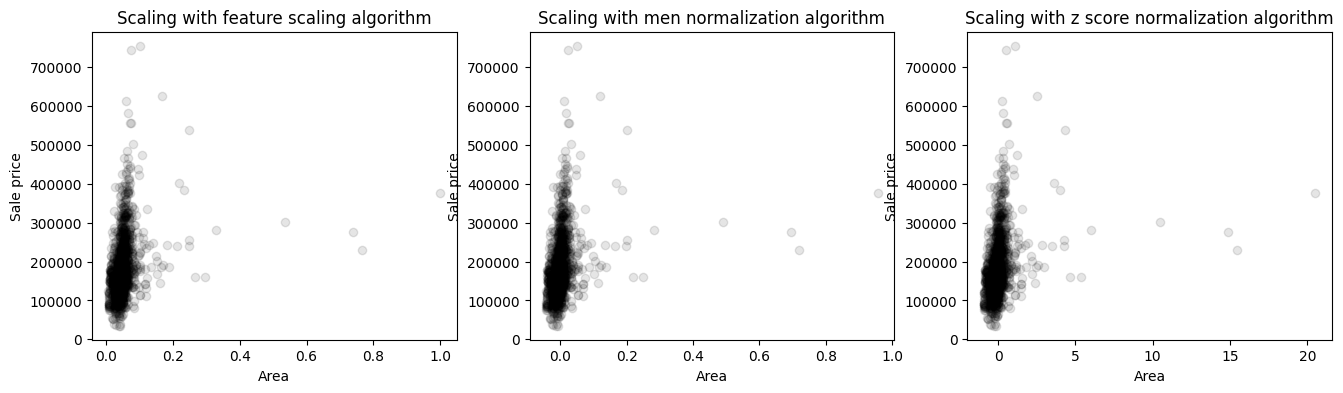

In [23]:
fig,ax=plt.subplots(1, 3, figsize=(16, 4))

ax[0].scatter(scaling(df["LotArea"]), df["SalePrice"], color="black", alpha=0.1)
ax[0].set_ylabel('Sale price')
ax[0].set_xlabel('Area')
ax[0].set_title("Scaling with feature scaling algorithm")


ax[1].scatter(mean_normalization(df["LotArea"]), df["SalePrice"], color="black", alpha=0.1)
ax[1].set_ylabel('Sale price')
ax[1].set_xlabel('Area')
ax[1].set_title("Scaling with men normalization algorithm")


ax[2].scatter(z_score_normalization(df["LotArea"]), df["SalePrice"], color="black", alpha=0.1)
ax[2].set_ylabel('Sale price')
ax[2].set_xlabel('Area')
ax[2].set_title("Scaling with z score normalization algorithm")


plt.show()

Let's try to run the gradient descent now that we can have better features

In [24]:
X_normalized = normalize_df(x_train)

w, b, w_history, b_history, costs_history = multiple_linear_regression(X_normalized, y_train, lr=1, iterations=1e5)

Iteration 0: Cost 2981542367.8810854, Weight [ 977.81040531 9650.14469688 9085.94035325], Bias 180921.19589041095
Model converged using  after 4097 iterations with: 
Cost: 1047869476.6768583 
Weight: [319555.45721832 363943.61960017  42586.30827929] 
Bias: 180921.19589041095


The cost got much lower with this statistical trick, from almost 3x10^9 to around 1x10^9. Also, the model ran much faster due to vectorization.

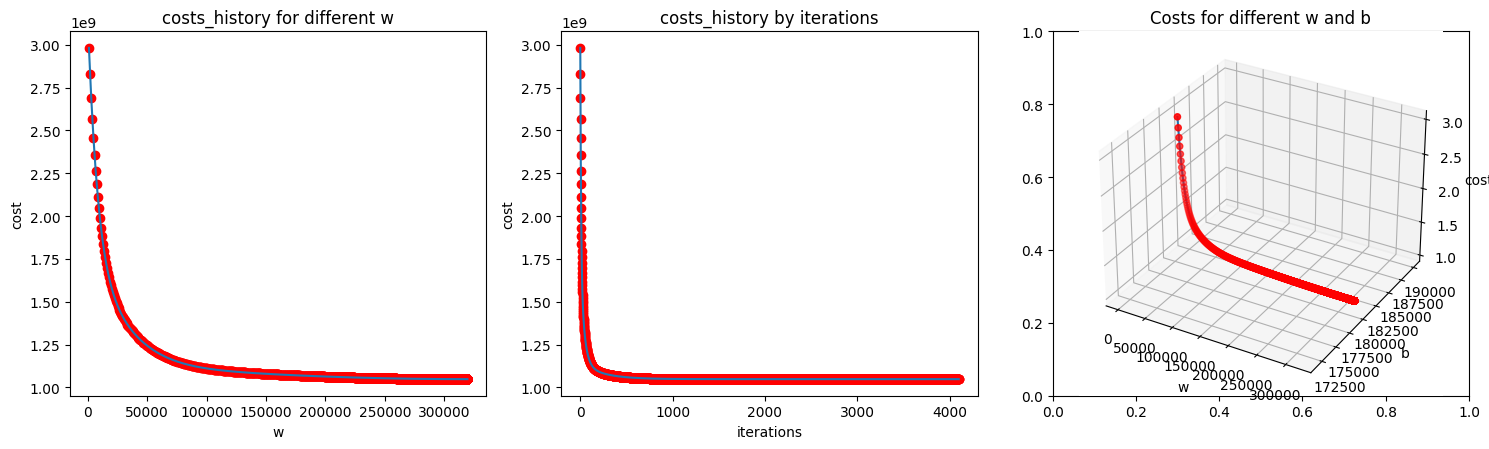

In [25]:
w1_history = [w[0] for w in w_history]
w2_history = [w[1] for w in w_history]
w3_history = [w[2] for w in w_history]

plot_gradient_descent(w1_history, b_history, costs_history)

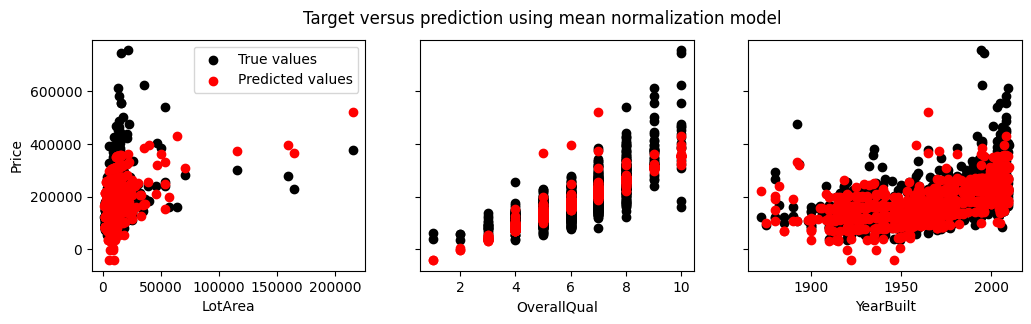

In [26]:
# predict target using normalized features
m = X_normalized.shape[0]
n_features = X_normalized.shape[1]
outputs = calculate_model_output(w, b, X_normalized)

# plot predictions and targets versus original features    
fig, ax = plt.subplots(1, n_features, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(x_train.iloc[:, i], y_train, color="black", label="True values")
    ax[i].set_xlabel(x_train.columns[i])
    ax[i].scatter(x_train.iloc[:, i], outputs, color="red", label='Predicted values')

ax[0].set_ylabel("Price") 
ax[0].legend()
fig.suptitle("Target versus prediction using mean normalization model")
plt.show()


# Regularized Linear Regression

## Cost function

The equation for the cost function regularized linear regression is:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{6}$$ 

where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{7} $$ 

The diferrence from the old cost function is the regularization term:
<span style="color:orange">
$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ 
</span> 
    
Including this term encourages gradient descent to minimize the size of the parameters. The parameter $b$ will not be regularized. This is standard practice because regularizing it usually dosen't change performance.

In [27]:
def compute_cost_linear_reg(w, b, x, y, lambda_ = 1):
  """
  Computes the cost over all examples
  Args:
    X (ndarray (m,n): Data, m examples with n features
    y (ndarray (m,)): target values
    w (ndarray (n,)): model parameters  
    b (scalar)      : model parameter
    lambda_ (scalar): Controls amount of regularization
  Returns:
    total_cost (scalar):  cost 
  """
  m = len(x)
  reg_cost = lambda_/(2*m) * np.sum(w**2)
  
  total_cost = cost_function(w, b, x, y) + reg_cost
  
  return total_cost

## Gradient descent with regularization

The basic algorithm for running gradient descent does not change with regularization. What changes is the derivative for $f_{\mathbf{w}b}$, with the added regularization term $ \frac{\lambda}{m} w_j $


$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{8}
\end{align*}$$

For a **linear** regression model  
    $f_{\mathbf{w},b}(x) = \mathbf{w} \cdot \mathbf{x} + b$  

In [78]:
def compute_gradient_linear_reg(x, y, w, b, lambda_):
    """
    Computes the gradient using formula

    Args:
        x (ndarray): Shape (m, n) variable, where m is the number of samples and n is the number of features
        y (ndarray): Shape (m,) target
        w (ndarray): Shape (n,) parameter of the model
        b (scalar): Parameter of the model
        lambda_ (scalar): Controls amount of regularization

    Returns:
        dJ_dw (ndarray (n,)): Partial derivative of cost with respect to w from parameters.
        dJ_db (scalar): Partial derivative of cost with respect to b.
    Computes the gradient for linear regression 
    """
    
    m = len(x)
    f_wb = calculate_model_output_multiple(w, b, x)
    dJ_dw = np.dot((f_wb - y), x)
    dJ_db = np.sum(f_wb - y)
    
    dJ_dw = np.multiply(dJ_dw, 1/m) + np.dot(lambda_/m, w)
    dJ_db *= (1 / m)
    
    return dJ_dw, dJ_db

def gradient_linear_reg(x, y, lr=0.01, lambda_=1, thold=1e-2, iterations=100000, verbose=True):
    w = [np.random.rand() for _ in x.columns]
    b = np.random.rand()
    
    w_history = []
    b_history = []
    costs_history = []  # current cost = costs_history[-1] / last cost = costs_history[-2]
    
    for i in range(int(iterations)):
        dJ_dw, dJ_db = compute_gradient_linear_reg(x, y, w, b, lambda_)
        # Updating parameters
        w = w - lr * dJ_dw
        b = b - lr * dJ_db
        
        costs_history.append(compute_cost_linear_reg(w, b, x, y))
        w_history.append(w)
        b_history.append(b)

        # Printing the parameters for every 100th iteration
        if i % 5000 == 0 and verbose==True:
            print(f"Iteration {i}: Cost {costs_history[-1]}, Weight {w}, Bias {b}")
            
            
        if len(costs_history) >= 2 and abs(costs_history[-2] - costs_history[-1]) <= thold:
            break
    
    print(f"Model converged using  after {i} iterations with: \nCost: {costs_history[-1]} \nWeight: {w} \nBias: {b}")
    
    return w, b, w_history, b_history, costs_history

In [29]:
X_normalized = normalize_df(x_train)

w, b, w_history, b_history, costs_history = gradient_linear_reg(X_normalized, y_train, lr=1, iterations=1e5)

Iteration 0: Cost 2981612228.5809584, Weight [ 977.23807014 9649.69032411 9085.39438385], Bias 180921.19589041098
Model converged using  after 3102 iterations with: 
Cost: 1119423793.3593526 
Weight: [245779.88906239 352777.87484217  46629.64885802] 
Bias: 180921.19589041095


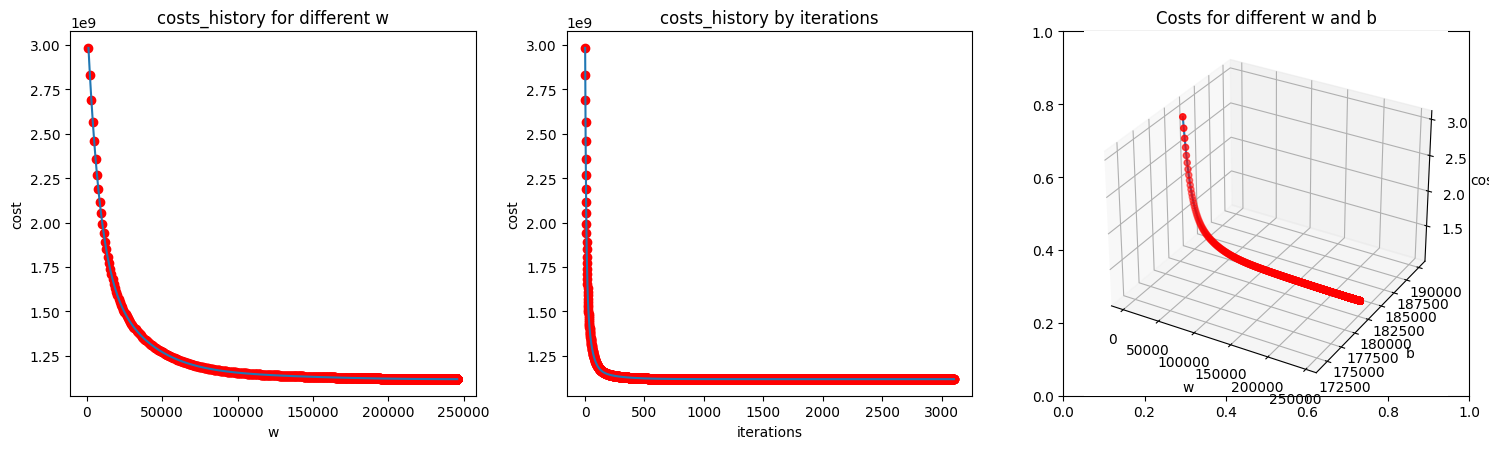

In [30]:
w1_history = [w[0] for w in w_history]
w2_history = [w[1] for w in w_history]
w3_history = [w[2] for w in w_history]

plot_gradient_descent(w1_history, b_history, costs_history)

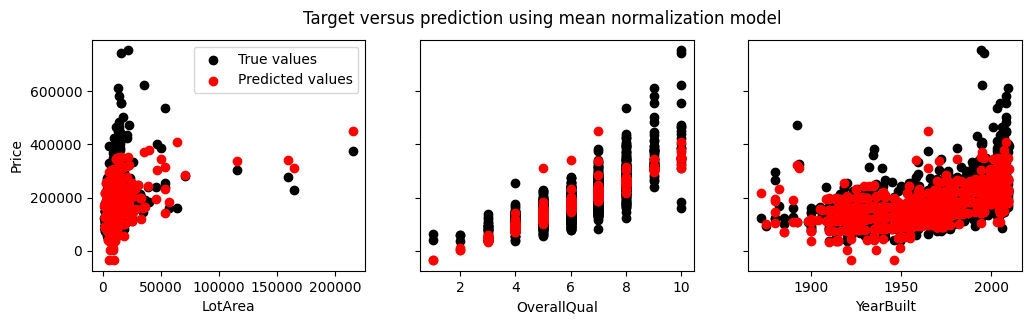

In [31]:
# predict target using normalized features
m = X_normalized.shape[0]
n_features = X_normalized.shape[1]
outputs = calculate_model_output(w, b, X_normalized)

# plot predictions and targets versus original features    
fig, ax = plt.subplots(1, n_features, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(x_train.iloc[:, i], y_train, color="black", label="True values")
    ax[i].set_xlabel(x_train.columns[i])
    ax[i].scatter(x_train.iloc[:, i], outputs, color="red", label='Predicted values')

ax[0].set_ylabel("Price") 
ax[0].legend()
fig.suptitle("Target versus prediction using mean normalization model")
plt.show()


# Model Analysis

## Split the dataset into training, cross validation, and test sets

To understand better about the model generalization capacibilities, the data will be split into three parts:

* ***training set*** - used to train the model
* ***cross validation set (also called validation, development, or dev set)*** - used to evaluate the different model configurations you are choosing from. For example, you can use this to make a decision on what polynomial features to add to your dataset.
* ***test set*** - used to give a fair estimate of your chosen model's performance against new examples. This should not be used to make decisions while you are still developing the models.

This way we can evaluate if the model has overfit to the training set. Scikit-learn provides a [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split your data into the parts mentioned above. In the code cell below, you will split the entire dataset into 60% training, 20% cross validation, and 20% test.

In [32]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x_train, y_train, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

## Polynomial Features

x_train

In [33]:
def polynomial_features(X, degree=2, interaction_only=False, include_bias=True):
    
    features = [X]
    
    # Gera features polinomiais adicionais
    for d in range(2, degree + 1):
        features.append(np.power(X, d))
    
    # Concatena todas as features geradas
    return np.hstack(features)

In [34]:
X_train_mapped = polynomial_features(x_train, 2)
X_train_mapped[0]

array([    15498,         8,      1976, 240188004,        64,   3904576],
      dtype=int64)

In [35]:
for _, row in x_train.iterrows():
    print(row)

LotArea        15498
OverallQual        8
YearBuilt       1976
Name: 1024, dtype: int64
LotArea        53227
OverallQual        4
YearBuilt       1954
Name: 457, dtype: int64
LotArea        12615
OverallQual        6
YearBuilt       1950
Name: 175, dtype: int64
LotArea        9375
OverallQual       7
YearBuilt      2003
Name: 549, dtype: int64
LotArea        15750
OverallQual        5
YearBuilt       1953
Name: 300, dtype: int64
LotArea        7015
OverallQual       5
YearBuilt      1950
Name: 459, dtype: int64
LotArea        11248
OverallQual        9
YearBuilt       2002
Name: 683, dtype: int64
LotArea        1491
OverallQual       4
YearBuilt      1972
Name: 614, dtype: int64
LotArea        14303
OverallQual        8
YearBuilt       1994
Name: 1256, dtype: int64
LotArea        10400
OverallQual        7
YearBuilt       1998
Name: 1201, dtype: int64
LotArea        9000
OverallQual       5
YearBuilt      1974
Name: 1450, dtype: int64
LotArea        13728
OverallQual        6
YearBuilt

In [36]:
def polynomial_features(x, degree=2):
    """
    Generate polynomial and interaction features for a dataset.
    
    Args:
    X (ndarray): Dataset.
    degree (int or tuple): Degree of the polynomial to be generated.
    interaction_only (bool): If True, only interaction features are produced.
    include_bias (bool): If True, include a bias column.
    
    Returns:
    ndarray: Dataset with the generated polynomial features.
    """
    from itertools import combinations_with_replacement
    
    result = []
    
    for _, row in x.iterrows():
        row_array = np.array(row)
        result_row = np.copy(row_array)  # Original features
        
        # Gerar todas as combinações de produtos até o grau especificado
        for d in range(2, degree + 1):
            combinations = combinations_with_replacement(row_array, d)
            for combo in combinations:
                product = np.prod(combo)
                result_row = np.append(result_row, product)
        
        result.append(result_row)
    
    return result

In [149]:
def plot_train_cv_mses(degrees, train_mses, cv_mses, title="Degree of polynomial vs. train and CV MSEs"):
    
    #fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    plt.plot(degrees, train_mses)
    plt.plot(degrees, cv_mses)
    
    #plt.scatter(w_history, costs_history, marker='o', color='red')
    plt.xlabel('Degree')
    plt.ylabel('Cost')
    plt.title(title)
    
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    plt.show()
    
def find_best_polynomial_features_sklearn(x_train, y_train, x_cv, y_cv, min_degree, max_degree):
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures
    from sklearn.metrics import mean_squared_error
    
    # Initialize lists to save the errors, models, and feature transforms
    train_mses = []
    cv_mses = []
    models = []
    polys = []
    scalers = []

    # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
    for degree in range(min_degree, max_degree + 1):
        
        # Add polynomial features to the training set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_train_mapped = poly.fit_transform(x_train)
        polys.append(poly)
        
        # Scale the training set
        scaler_poly = StandardScaler()
        X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
        scalers.append(scaler_poly)
        
        # Create and train the model
        model = LinearRegression()
        model.fit(X_train_mapped_scaled, y_train )
        models.append(model)
        
        # Compute the training MSE
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat) / 2
        train_mses.append(train_mse)
        
        # Add polynomial features and scale the cross validation set
        X_cv_mapped = poly.transform(x_cv)
        X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
        
        # Compute the cross validation MSE
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        cv_mses.append(cv_mse)
        
    # Plot the results
    degrees=range(min_degree, max_degree + 1)
    plot_train_cv_mses(degrees, train_mses, cv_mses)
    
    return train_mses, cv_mses, models, polys, scalers

def find_best_polynomial_features_my(x_train, y_train, x_cv, y_cv, min_degree, max_degree):
    # Initialize lists to save the errors, models, and feature transforms
    train_mses = []
    cv_mses = []
    scalers = []

    # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
    for degree in range(min_degree, max_degree + 1):
        
        # Add polynomial features to the training set
        X_train_mapped = polynomial_features(x_train, degree)
        
        # Scale the training set
        X_train_mapped_scaled = z_score_normalization(X_train_mapped)
        scalers.append(X_train_mapped_scaled)
        
        # Create and train the model
        w, b, w_history, b_history, costs_history = gradient_linear_reg(pd.DataFrame(X_train_mapped_scaled), y_train, lr=0.000001, lambda_=1, thold=1, iterations=20000, verbose=False)

        # Compute the training MSE
        # yhat = calculate_model_output(w, b, X_train_mapped_scaled)
        train_mse = cost_function(w, b, X_train_mapped_scaled, y_train) / 2
        train_mses.append(train_mse)
        
        # Add polynomial features and scale the cross validation set
        X_cv_mapped = polynomial_features(x_cv, degree)
        X_cv_mapped_scaled = z_score_normalization(X_cv_mapped)
        
        # Compute the cross validation MSE
        # yhat = calculate_model_output(w, b, X_cv_mapped_scaled)
        cv_mse = cost_function(w, b, X_cv_mapped_scaled, y_cv) / 2
        cv_mses.append(cv_mse)
        
        w1_history = [w[0] for w in w_history]
        # w2_history = [w[1] for w in w_history]
        # w2_history = [w[2] for w in w_history]
        plot_gradient_descent(w1_history, b_history, costs_history)
        # plot_gradient_descent(w2_history, b_history, costs_history)
        # plot_gradient_descent(w3_history, b_history, costs_history)
        
    # Plot the results
    degrees=range(min_degree, max_degree + 1 + 1)
    plot_train_cv_mses(degrees, train_mses, cv_mses)
    # utils.plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")
    
    return train_mses, cv_mses, scalers

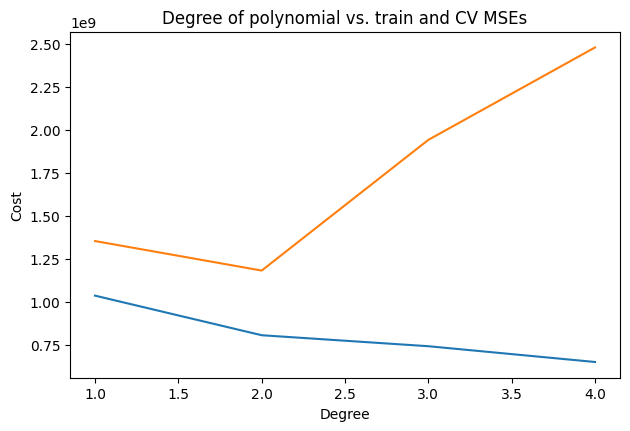

Model converged using  after 19999 iterations with: 
Cost: 18738954497.3666 
Weight: [ 2047.58267517 -1116.45357077  -594.26693186] 
Bias: 3597.262168105441


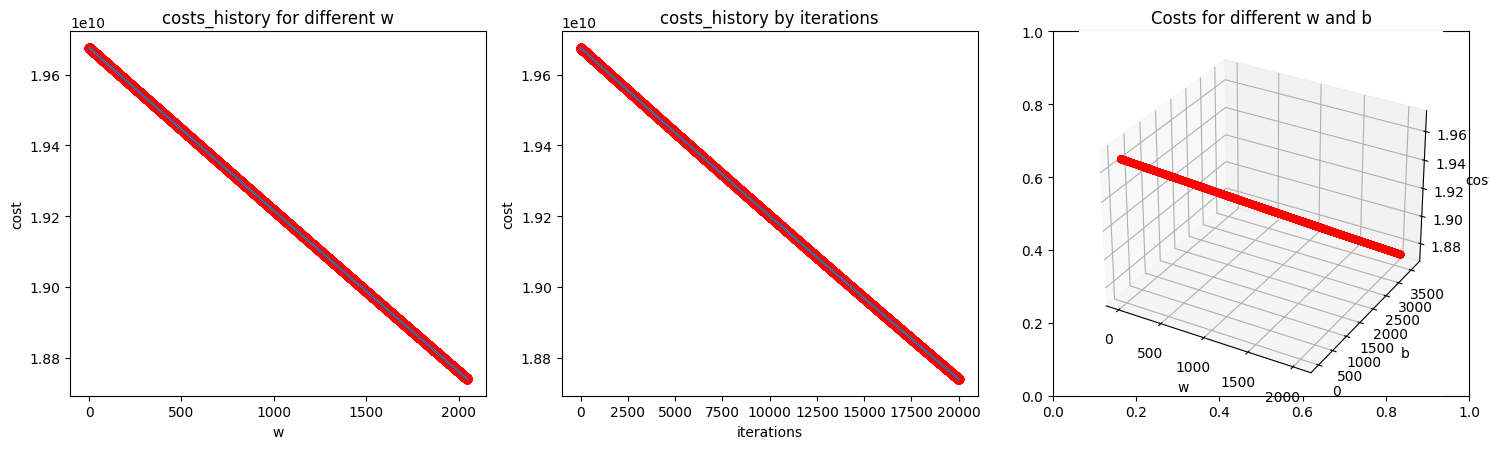

Model converged using  after 19999 iterations with: 
Cost: 19004412258.194263 
Weight: [-55.22452853 -55.20687909 -54.96824469 604.80953813 -55.14234058
  -9.17412631 -55.29625219 -55.53496071 -47.5856515 ] 
Bias: 3610.743401223754


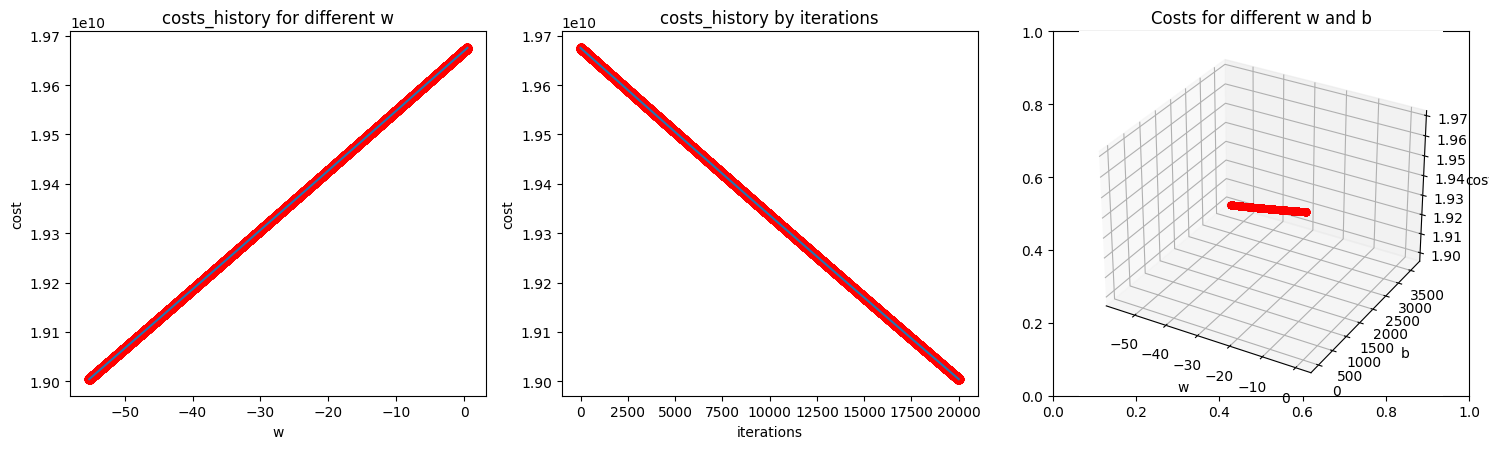

Model converged using  after 19999 iterations with: 
Cost: 19017162119.40556 
Weight: [-10.84093887 -10.79721277 -10.27286763 -10.54122804 -10.21382672
  -9.97188974 -10.2521228  -10.0684093  -10.6223679  354.65960904
 -10.06330158  -3.38903647 -10.29966833  -9.98699473 -10.05898764
 -10.24780513 -10.10615937  -9.9710367  -10.21119061] 
Bias: 3611.2779472857405


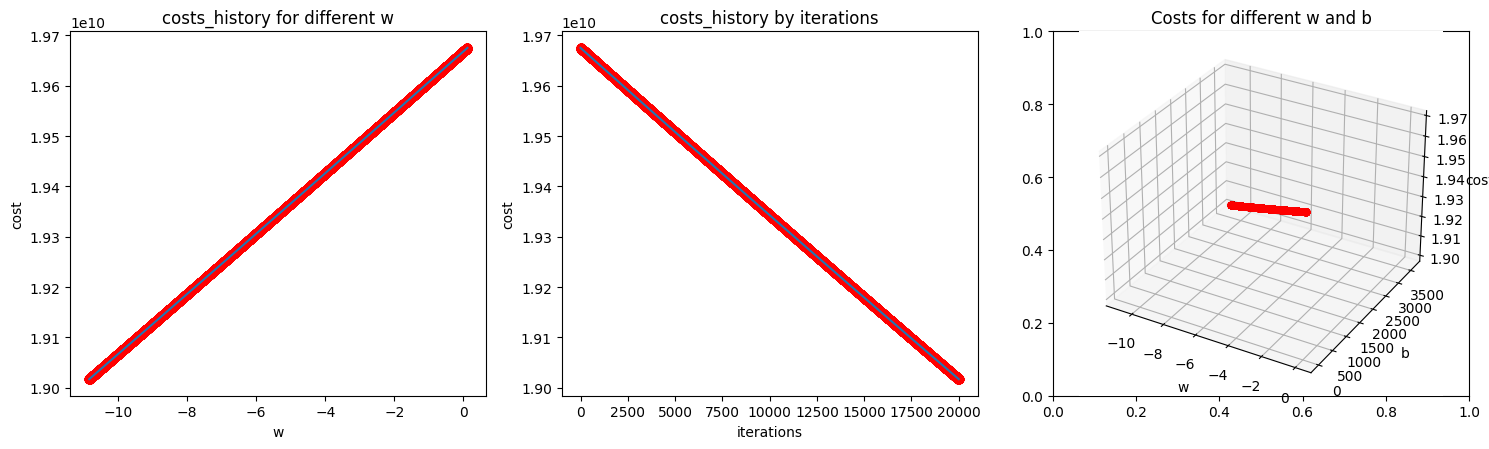

In [153]:
features_sklearn = find_best_polynomial_features_sklearn(x_train, y_train, x_cv, y_cv, 1, 4)

features_my = find_best_polynomial_features_my(x_train, y_train, x_cv, y_cv, 1, 4)

Obviously, the sklearn model performed better and mutch faster than our own. But we can see that on it, the 

## Bias and Variance